### Problem Statement- Gucci, the renowned Italian luxury brand, is planning to open a new boutique in a high-end shopping mall. As part of their grand opening, they want to create a buzz and attract the right clientele to their store. They've partnered with the mall's management to use targeted marketing strategies to maximize their reach and effectiveness. As the data analyst for the mall, you have access to a comprehensive database of mall visitors, which includes details such as annual income, spending scores (indicating how much they spend in the mall and how often), visit frequency, and purchase history. Your task is to analyze this data to identify the ideal customers for Gucci's targeted marketing campaign. The goal is to send personalized push notifications to these customers, informing them about Gucci's new store opening, exclusive offers, and perhaps an invite to a special inaugural event. Given Gucci's positioning as a luxury brand, the target demographic is likely to be individuals with high disposable income and a propensity for spending on high-end fashion and luxury goods.

### Initial Hypothesis : Annual Income Vs Spending Score

### Dataset Link: https://drive.google.com/file/d/1yBkTe9-gxSxlSm0PGfBmi_ajFt8sxm_b/view?usp=sharing

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
# Loading the Dataset
credit_df = pd.read_csv('Mall_Customers.csv')
credit_df.head()

In [4]:
credit_df.shape

(200, 5)

In [ ]:
credit_df.info()

In [5]:
# check for missing values
credit_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Mapping Text data to Binary Values

In [24]:
credit_df['Genre'] = credit_df['Genre'].map({'Female':0,'Male':1}).astype(int)
print(credit_df.head())

   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1      1   19                  15                      39        2
1           2      1   21                  15                      81        1
2           3      0   20                  16                       6        2
3           4      0   23                  16                      77        1
4           5      0   31                  17                      40        2


In [20]:
# normalize the features
from sklearn.preprocessing import StandardScaler, normalize
X = credit_df.iloc[:,3:5].values # Columns of Interest
X = StandardScaler().fit_transform(X)
X = normalize(X)
print(X)

[[-0.97013572 -0.24256276]
 [-0.82401048  0.56657455]
 [-0.7039784  -0.71022139]
 [-0.85305371  0.52182312]
 [-0.97279192 -0.23168055]
 [-0.85658242  0.51601024]
 [-0.68749685 -0.72618736]
 [-0.69078646  0.72305883]
 [-0.65452065 -0.75604412]
 [-0.88229014  0.47070597]
 [-0.74851489 -0.66311798]
 [-0.64199257  0.76671086]
 [-0.74971714 -0.66175843]
 [-0.82998676  0.55778309]
 [-0.73123898 -0.68212137]
 [-0.81069137  0.58547374]
 [-0.93140492 -0.36398472]
 [-0.92647723  0.37635083]
 [-0.86725326 -0.49786723]
 [-0.61137179  0.7913435 ]
 [-0.92103954 -0.38946909]
 [-0.84445476  0.53562689]
 [-0.61183513 -0.79098532]
 [-0.83762959  0.54623866]
 [-0.66245749 -0.74909951]
 [-0.70946363  0.70474205]
 [-0.86933095 -0.49423041]
 [-0.94753177  0.3196616 ]
 [-0.85037495 -0.52617719]
 [-0.64462638  0.76449777]
 [-0.54520069 -0.83830556]
 [-0.79661478  0.6044873 ]
 [-0.50591796 -0.8625816 ]
 [-0.54395835  0.83911222]
 [-0.59925019 -0.80056181]
 [-0.6605323   0.75079763]
 [-0.61823317 -0.78599475]
 

### Train the Model:

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, preds, metric = 'euclidean')
    print('For n_clusters = {}, silhouutte score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(X)
    visualizer.poof()

For n_clusters = 2, silhouutte score is 0.4705509597246642


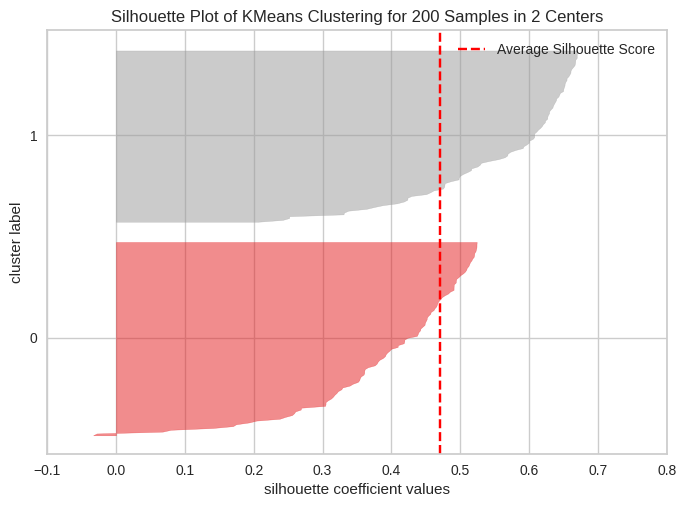

For n_clusters = 3, silhouutte score is 0.6032007063012638


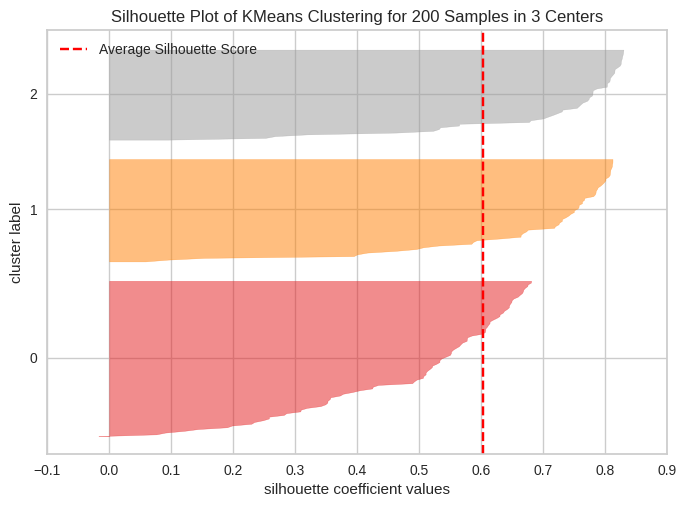

For n_clusters = 4, silhouutte score is 0.6616413670429191


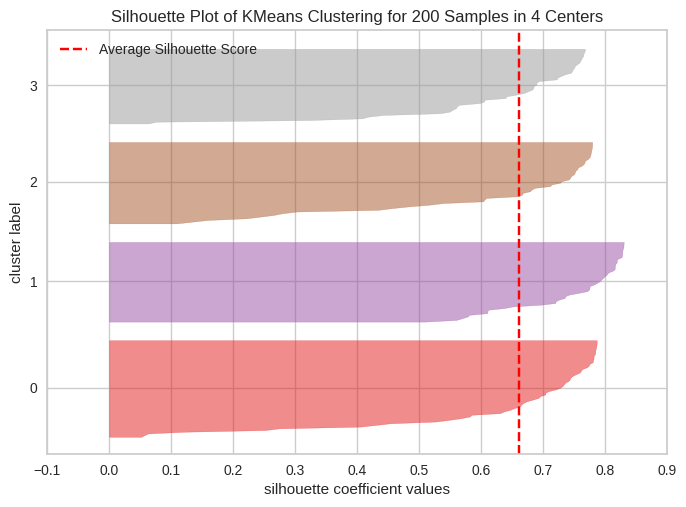

For n_clusters = 5, silhouutte score is 0.6183363219711807


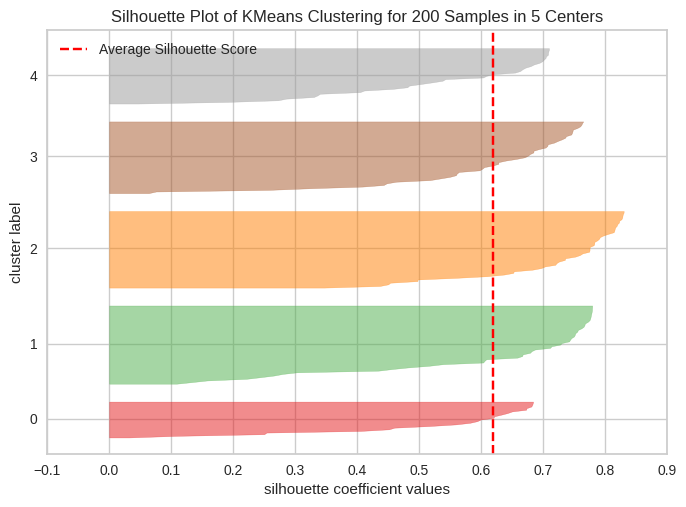

For n_clusters = 6, silhouutte score is 0.5932920412415835


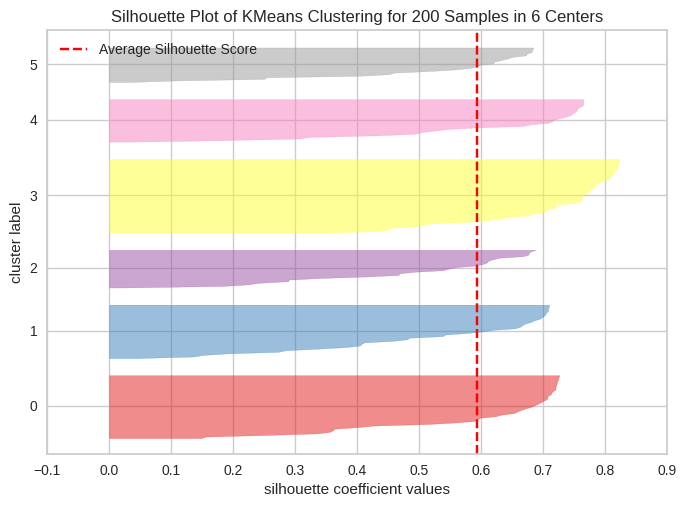

For n_clusters = 7, silhouutte score is 0.5636711171722084


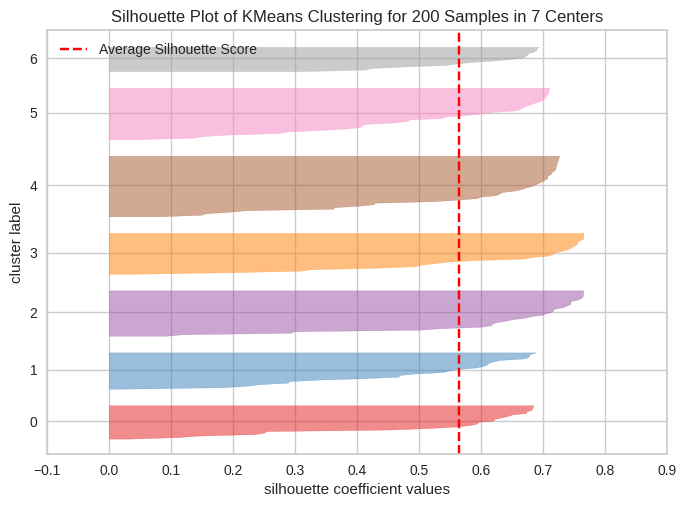

For n_clusters = 8, silhouutte score is 0.5600826684015443


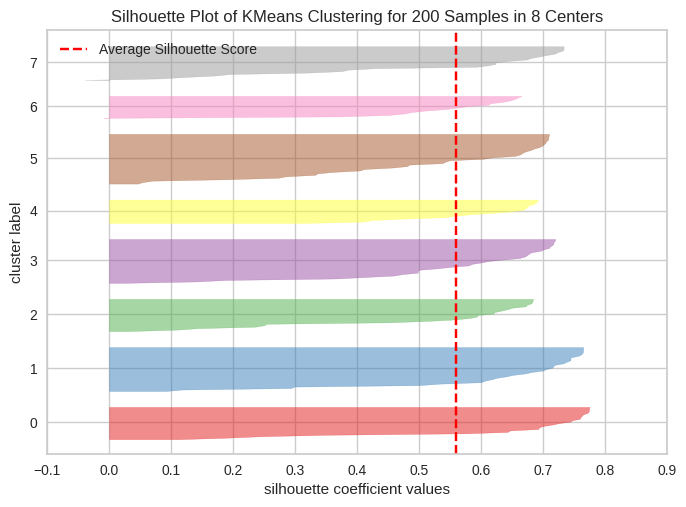

For n_clusters = 9, silhouutte score is 0.5620016384539713


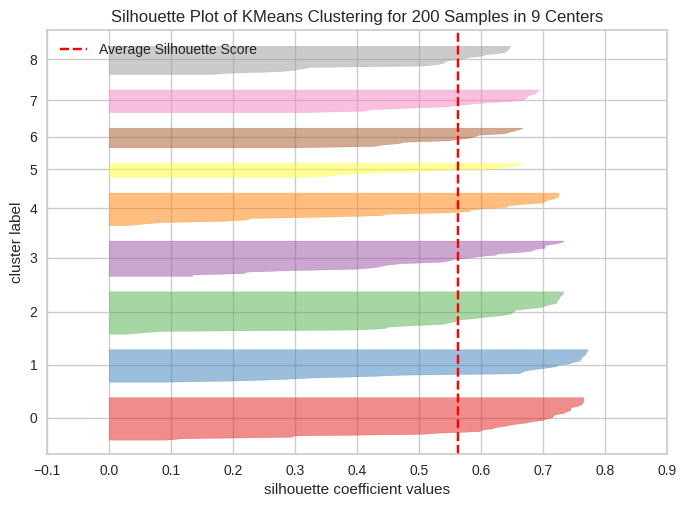

In [12]:
silhouette_analysis(10)

### Elbow Method:

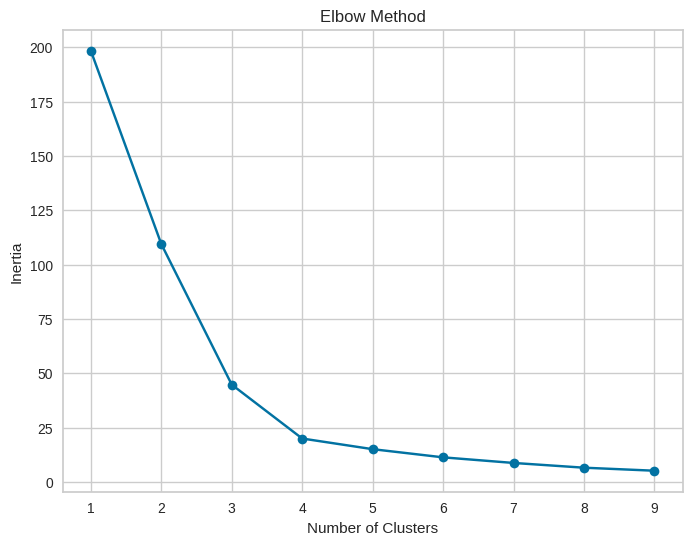

In [19]:
# Applying k-means with different number of clusters
inertia =[] #List to store the inertia for each k
for k in range(1,10):
  kmeans = KMeans(n_clusters = k,random_state = 0).fit(X)
  inertia.append(kmeans.inertia_)

# Plotting the Elbow Method Graph
plt.figure(figsize = (8, 6))
plt.plot(range(1,10), inertia, marker = 'o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(range(1,10))
plt.show()

In [25]:
# Apply k-means with the chosen number of clusters (assuming k=4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
credit_df['Cluster'] = cluster_labels

# Analyze the clusters
# This part involves statistical analysis of each cluster, for example:
print(credit_df.groupby('Cluster').mean())

         CustomerID     Genre        Age  Annual Income (k$)  \
Cluster                                                        
0        142.965517  0.465517  40.224138           78.655172   
1         48.857143  0.428571  34.469388           38.877551   
2         46.200000  0.377778  46.244444           37.555556   
3        152.812500  0.479167  34.729167           82.395833   

         Spending Score (1-100)  
Cluster                          
0                     27.568966  
1                     66.183673  
2                     33.088889  
3                     77.270833  


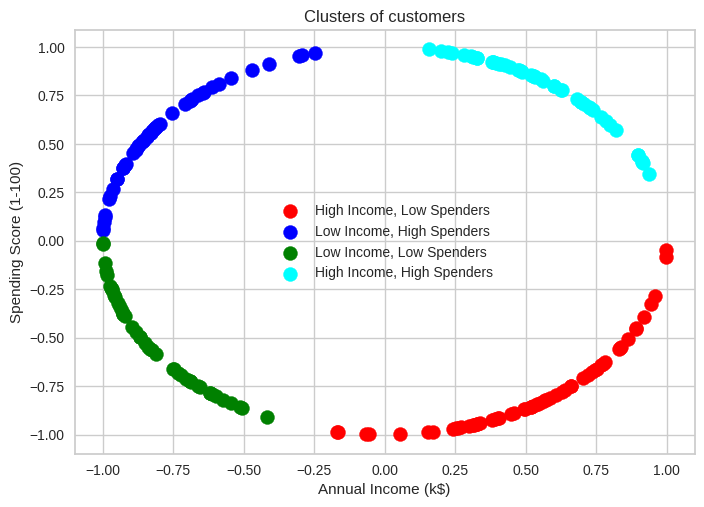

In [22]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], s = 100, c = 'red', label = 'High Income, Low Spenders')
plt.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], s = 100, c = 'blue', label = 'Low Income, High Spenders')
plt.scatter(X[cluster_labels == 2, 0], X[cluster_labels == 2, 1], s = 100, c = 'green', label = 'Low Income, Low Spenders')
plt.scatter(X[cluster_labels == 3, 0], X[cluster_labels == 3, 1], s = 100, c = 'cyan', label = 'High Income, High Spenders')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()